**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Phase 1: Sample**

In this phase, we'll gather and prepare the data for analysis.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/gdrive/MyDrive/Assignment 3 Datasets/bank.csv")

In [ ]:
# Examine the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Phase 2: Explore**

In this phase, we'll explore the dataset to understand its characteristics and relationships among variables.

In [ ]:
# Summary statistics
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Visualizations (e.g., histograms, scatter plots)
import matplotlib.pyplot as plt
import seaborn as sns

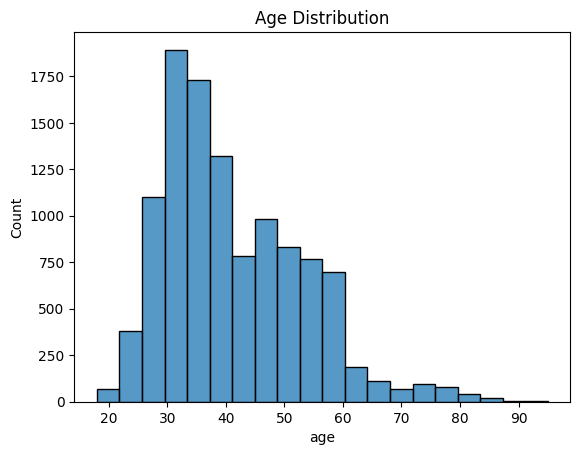

In [ ]:
# Example: Histogram of age
sns.histplot(data=data, x="age", bins=20)
plt.title("Age Distribution")
plt.show()

**Phase 3: Modify**

In this phase, we'll preprocess the data, handle missing values, encode categorical variables, and perform feature engineering.

In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=["job", "marital", "education", "housing", "loan", "default", "contact", "month", "poutcome"])

In [ ]:
# Convert the target variable 'deposit' to binary (1 for 'yes' and 0 for 'no')
data_encoded['deposit'] = data_encoded['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
# Split data into features and target variable
X = data_encoded.drop(columns=["deposit"])
y = data_encoded["deposit"]

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

**Phase 4: Model**

In this phase, we'll build predictive models to identify factors influencing customer subscription decisions. We'll use classification algorithms.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print(report)

Accuracy: 0.83833407971339
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



**Phase 5: Assess**

In this phase, we'll assess the model's performance and interpret the results.

In [ ]:
# Feature importance from the model
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_classifier.feature_importances_
})

In [ ]:
# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)


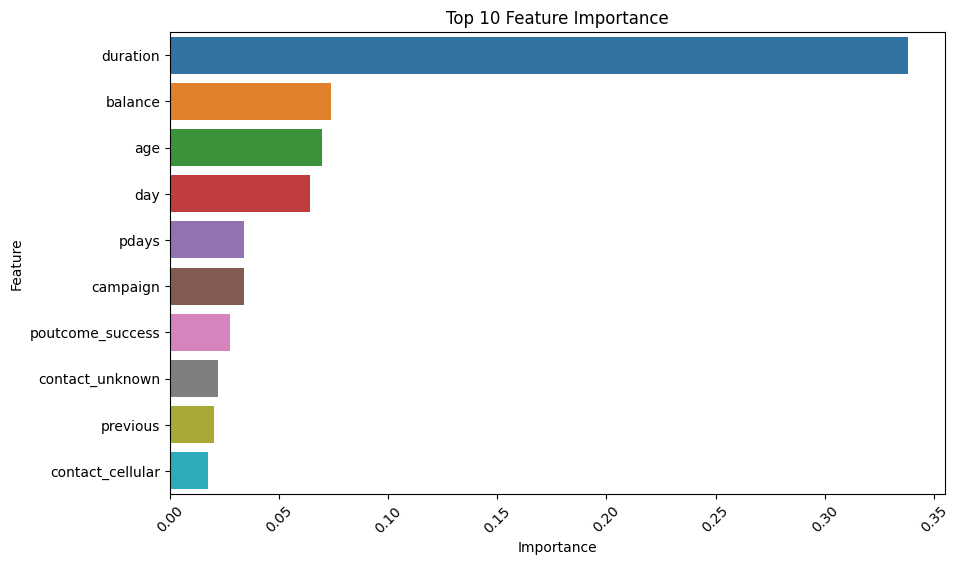

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importance")
plt.xticks(rotation=45)
plt.show()